In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/time/AirPassengers.csv'

In [4]:
df = pd.read_csv(path, parse_dates=['Month'], index_col='Month')

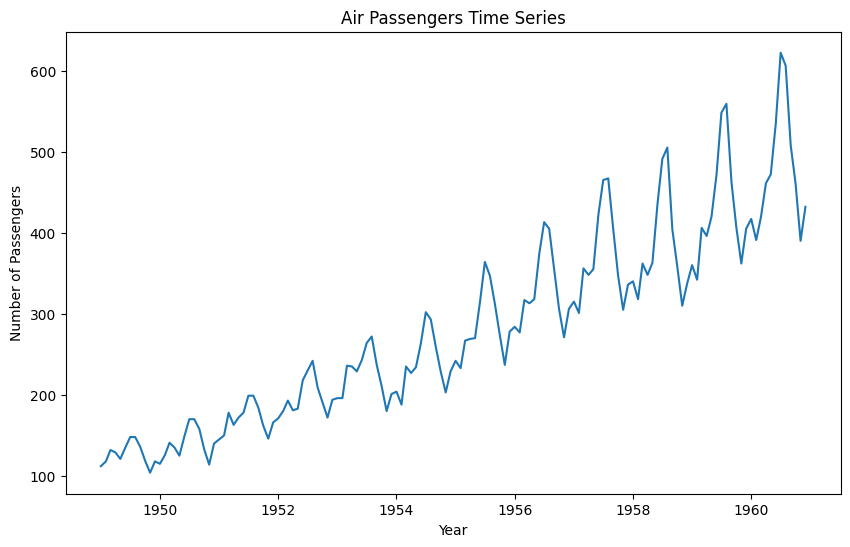

In [5]:
# Visualize the time series data using line plot
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Time Series')
plt.show()


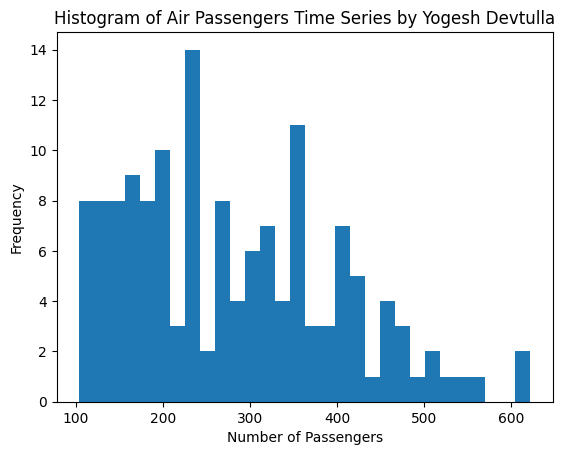

In [6]:
# Plot a histogram to check the distribution of data
plt.hist(df['Passengers'], bins=30)
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Histogram of Air Passengers Time Series by Yogesh Devtulla')
plt.show()

In [7]:
# Check for missing values
print(df.isnull().sum())

Passengers    0
dtype: int64


In [8]:
# Fill missing values (if any) using forward fill
df.fillna(method='ffill', inplace=True)

In [9]:
# Smooth noisy data using moving average (window size = 12 for yearly seasonality)
df['Smoothed_Passengers'] = df['Passengers'].rolling(window=12).mean()

In [10]:
from statsmodels.tsa.seasonal import STL

# STL decomposition
stl = STL(df['Passengers'], seasonal=13)
result = stl.fit()

# Access the decomposition components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Model selection and training (Using SARIMA as an example)
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
sarima_model = SARIMAX(df['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]


In [13]:
# Train the SARIMA model on the training data
sarima_model = SARIMAX(train_data['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()


In [14]:
# Make predictions on the test set
predictions = sarima_fit.forecast(len(test_data))

In [15]:
# Evaluate the model using MAE and RMSE
mae = mean_absolute_error(test_data['Passengers'], predictions)
rmse = mean_squared_error(test_data['Passengers'], predictions, squared=False)

In [16]:
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 23.55558016685625
Root Mean Squared Error (RMSE): 30.14185280382133


In [17]:
# Make future predictions (next 24 months)
forecast = sarima_fit.forecast(steps=24)

In [18]:
# Combine original data and forecasts for visualization
combined_data = pd.concat([df['Passengers'], forecast])

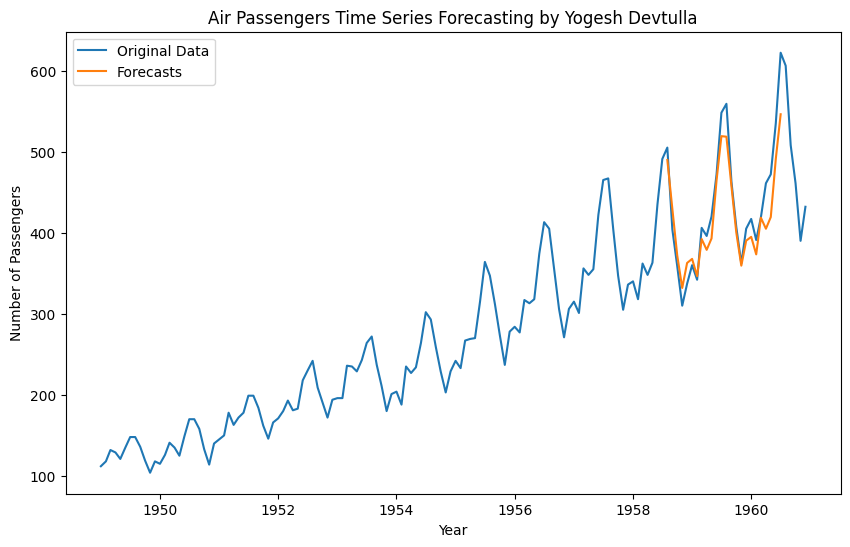

In [19]:
# Visualize the original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(forecast, label='Forecasts')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Time Series Forecasting by Yogesh Devtulla')
plt.legend()
plt.show()